**Question 3: Consider the 'Blood Pressure Before' and 'Blood Pressure After' columns from the data and calculate the following:**
1. Measure the dispersion in both and interpret the results.
2. Calculate mean and 5% confidence interval and plot it in a graph.
3. Calculate the Mean absolute deviation and Standard deviation and interpret the results.
4. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

[Link](https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?pli=1)

In [1]:
# Imports
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

In [2]:
# Loading the data
df = pd.read_csv("Question_03_data.csv")
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Patient ID                     100 non-null    int64
 1    Blood Pressure Before (mmHg)  100 non-null    int64
 2    Blood Pressure After (mmHg)   100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


# 1. Measure the dispersion in both and interpret the results.
I will use *standard deviation* as the measure of dispersion.

In [4]:
df.describe()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
count,100.000000,100.000000,100.000000
mean,50.500000,133.910000,128.360000
std,29.011492,6.598278,6.888022
min,1.000000,120.000000,118.000000
25%,25.750000,128.000000,123.000000
50%,50.500000,135.000000,128.000000
75%,75.250000,139.250000,135.000000
max,100.000000,148.000000,141.000000


We can see that the standard deviation of `Blood Pressure Before (mmHg)` is 6.598278 mmHg, and the standard deviation of `Blood Pressure After (mmHg)` is 6.888022 mmHg. So, the variable `Blood Pressure After (mmHg)` has slightly higher dispersion than the variable `Blood Pressure Before (mmHg)`.

In [5]:
df.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

Text(0, 0.5, 'Blood Pressure (mmHg)')

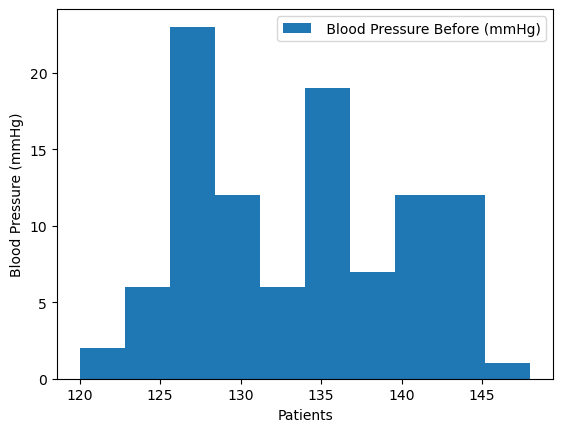

In [6]:
df[[" Blood Pressure Before (mmHg)"]].plot(kind="hist");
plt.xlabel("Patients")
plt.ylabel("Blood Pressure (mmHg)")

Text(0, 0.5, 'Blood Pressure (mmHg)')

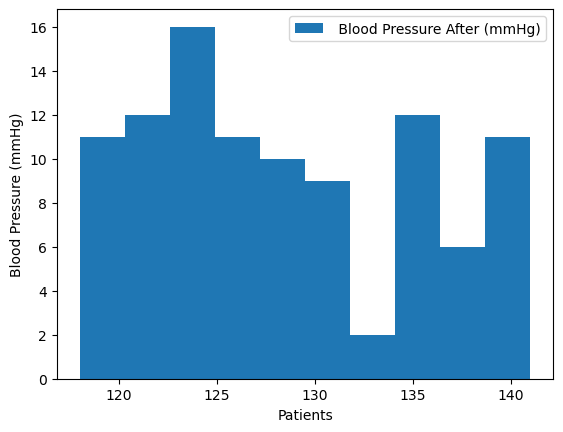

In [7]:
df[[" Blood Pressure After (mmHg)"]].plot(kind="hist");
plt.xlabel("Patients")
plt.ylabel("Blood Pressure (mmHg)")

# 2. Calculate mean and 5% confidence interval and plot it in a graph.

In [8]:
# Mean
df[[" Blood Pressure Before (mmHg)", " Blood Pressure After (mmHg)"]].mean()

 Blood Pressure Before (mmHg)    133.91
 Blood Pressure After (mmHg)     128.36
dtype: float64

In [9]:
# 5% confidence interval for `Blood Pressure Before (mmHg)`

conf_int_before = st.t.interval(
    alpha=0.05,
    df=len(df[[" Blood Pressure Before (mmHg)"]]) - 1,
    loc=np.mean(df[[" Blood Pressure Before (mmHg)"]]),
    scale=st.sem(df[[" Blood Pressure Before (mmHg)"]])
)

conf_int_before

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Sushrut\AppData\Local\Temp\ipykernel_10396\2687832154.py:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  conf_int_before = st.t.interval(


(array([133.8685193]), array([133.9514807]))

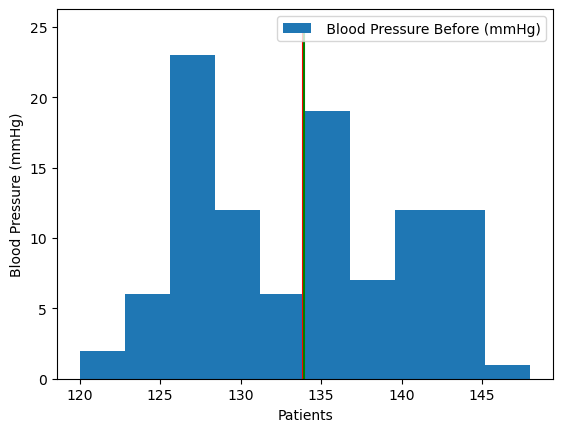

In [10]:
df[[" Blood Pressure Before (mmHg)"]].plot(kind="hist");
plt.xlabel("Patients")
plt.ylabel("Blood Pressure (mmHg)")
plt.vlines(x=conf_int_before, ymin=0, ymax=25, colors=["red", "green"])

In [11]:
# 5% confidence interval for `Blood Pressure After (mmHg)`

conf_int_after = st.t.interval(
    alpha=0.05,
    df=len(df[[" Blood Pressure After (mmHg)"]]) - 1,
    loc=np.mean(df[[" Blood Pressure After (mmHg)"]]),
    scale=st.sem(df[[" Blood Pressure After (mmHg)"]])
)

conf_int_after

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Sushrut\AppData\Local\Temp\ipykernel_10396\2183866009.py:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  conf_int_after = st.t.interval(


(array([128.31669779]), array([128.40330221]))

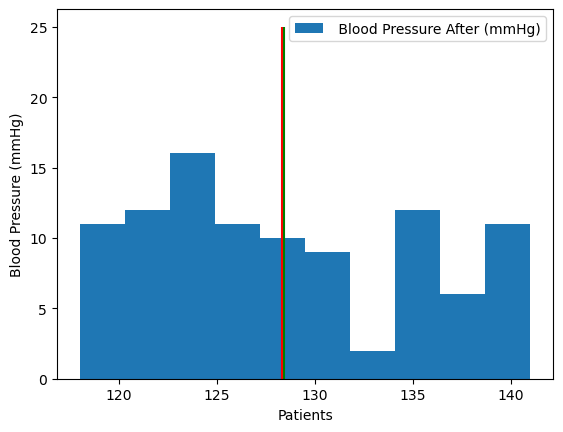

In [12]:
df[[" Blood Pressure After (mmHg)"]].plot(kind="hist");
plt.xlabel("Patients")
plt.ylabel("Blood Pressure (mmHg)")
plt.vlines(x=conf_int_after, ymin=0, ymax=25, colors=["red", "green"])

# 3. Calculate the Mean absolute deviation and Standard deviation and interpret the results.

In [13]:
df[[" Blood Pressure Before (mmHg)", " Blood Pressure After (mmHg)"]].mad()

C:\Users\Sushrut\AppData\Local\Temp\ipykernel_10396\962597970.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df[[" Blood Pressure Before (mmHg)", " Blood Pressure After (mmHg)"]].mad()


 Blood Pressure Before (mmHg)    5.7118
 Blood Pressure After (mmHg)     5.9000
dtype: float64

In [14]:
df[[" Blood Pressure Before (mmHg)", " Blood Pressure After (mmHg)"]].std()

 Blood Pressure Before (mmHg)    6.598278
 Blood Pressure After (mmHg)     6.888022
dtype: float64

Both the parameters, i.e., the mean absolute deviation, and the standard deviation, are measures of dispersion. Looking at both of these values, the interpretation is the same, i.e., `Blood Pressure After (mmHg)` has slightly greater dispersion than `Blood Pressure Before (mmHg)`.

# 4. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [15]:
pearsonr(df[" Blood Pressure Before (mmHg)"], df[" Blood Pressure After (mmHg)"])

PearsonRResult(statistic=0.9779485966556019, pvalue=1.8097381433068578e-68)

Since the p-value is $\ll 0.05$, we can conclude that there is a statistically significant association between the variables `Blood Pressure Before (mmHg)` and `Blood Pressure After (mmHg)`.